In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Project1_Data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
#!kaggle competitions download -c da218o-class-competition-predict-missing-data



Project1_Data/coordinates.csv
Project1_Data/Node_501.csv
Project1_Data/Node_502.csv
Project1_Data/Node_505.csv
Project1_Data/Node_507.csv
Project1_Data/Node_508.csv
Project1_Data/Node_locations.xlsx
Project1_Data/sample_submission.csv
Project1_Data/submission_file.csv


In [46]:
pd1 = pd.read_csv('Project1_Data/Node_501.csv', index_col=0)
pd1['lat'] = -37.8148084
pd1['lng'] = 144.980999
pd1['node'] = 501

pd2 = pd.read_csv('Project1_Data/Node_502.csv', index_col=0)
pd2['lat'] = -37.8146097
pd2['lng'] = 144.9790177
pd2['node'] = 502

pd3 = pd.read_csv('Project1_Data/Node_505.csv', index_col=0)
pd3['lat'] = -37.813073
pd3['lng'] = 144.9804061
pd3['node'] = 505

pd4 = pd.read_csv('Project1_Data/Node_507.csv', index_col=0)
pd4['lat'] = -37.8149218
pd4['lng'] = 144.9822582
pd4['node'] = 507

pd5 = pd.read_csv('Project1_Data/Node_508.csv', index_col=0)
pd5['lat'] = -37.8134078
pd5['lng'] = 144.9794923
pd5['node'] = 508



In [290]:
# center coordinate of all 5 sensors
lat0 = -37.8141641 #average of all 5 latitutes
lng0 = 144.9804347 #average of all 5 longitutude

In [292]:
spd = pd.concat([pd1, pd2,pd3,pd4,pd5], axis=0)
# spd = pd.concat([pd2], axis=0)

## Data preprocessing

In [293]:
spd['ts'] = spd.timestamp.apply(lambda x: pd.to_datetime(x.replace('/0014','/2014').replace('/0015','/2015'),format='%d/%m/%Y %H:%M'))
spd['ts_value'] = spd.ts.apply(lambda x: x.value/10**9)
spd['mins'] = spd.ts.apply(lambda x: (x.hour)*60 + x.minute-1)
min_maximum = spd.describe()['mins']['max']
spd['min_norm'] = spd.mins.apply(lambda x: (x)/(min_maximum))
spd['sin_minute'] = spd.min_norm.apply(lambda x: math.sin(x*2*math.pi))

spd['date'] = spd.ts.apply(lambda x: x.day-1 + (x.month-1)*30 + (x.year-2014)*30*12)
date_maximum = spd.describe()['date']['max']
date_minimum = spd.describe()['date']['min']
spd['date_norm'] = spd.date.apply(lambda x: (x-date_minimum)/(date_maximum-date_minimum))

spd.shape

(6583, 13)

In [224]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(spd['ts_value'])

spd_scaled = scaler.transform(spd['ts_value'])


ValueError: Expected 2D array, got 1D array instead:
array=[1.41808326e+09 1.41808386e+09 1.41808446e+09 ... 1.42078386e+09
 1.42078452e+09 1.42078512e+09].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [192]:
tnan = (spd['temperature'].notna())
hnan = (spd['humidity'].notna())
#tnan.head()
#hnan.head()
spd_train = spd[tnan & hnan]
spd_test = spd[ (tnan & hnan)==False]

In [193]:
print(spd_train.shape)
spd_train.head()

(1154, 13)


,timestamp,temperature,humidity,lat,lng,node,ts,ts_value,mins,date,sin_minute,date_norm,min_norm
ID,,,,,,,,,,,,,
1368,09/12/0014 00:01,23.54,30.63,-37.81461,144.979018,502,2014-12-09 00:01:00,1.418083e+09,0,338,0.000000,0.0,0.000000
1369,09/12/0014 00:11,23.54,31.11,-37.81461,144.979018,502,2014-12-09 00:11:00,1.418084e+09,10,338,0.043680,0.0,0.006954
1370,09/12/0014 00:21,23.54,30.63,-37.81461,144.979018,502,2014-12-09 00:21:00,1.418084e+09,20,338,0.087277,0.0,0.013908
1371,09/12/0014 00:32,23.54,30.79,-37.81461,144.979018,502,2014-12-09 00:32:00,1.418085e+09,31,338,0.135037,0.0,0.021558
1372,09/12/0014 00:42,22.90,30.63,-37.81461,144.979018,502,2014-12-09 00:42:00,1.418086e+09,41,338,0.178188,0.0,0.028512


In [194]:
print(spd_test.shape)
spd_test.head()

(100, 13)


,timestamp,temperature,humidity,lat,lng,node,ts,ts_value,mins,date,sin_minute,date_norm,min_norm
ID,,,,,,,,,,,,,
1389,09/12/0014 03:36,22.25,NaN,-37.81461,144.979018,502,2014-12-09 03:36:00,1.418096e+09,215,338,0.807215,0.0,0.149513
1401,09/12/0014 05:40,NaN,32.37,-37.81461,144.979018,502,2014-12-09 05:40:00,1.418104e+09,339,338,0.995991,0.0,0.235744
1419,09/12/0014 08:44,NaN,31.11,-37.81461,144.979018,502,2014-12-09 08:44:00,1.418115e+09,523,338,0.755489,0.0,0.363700
1433,09/12/0014 11:08,23.22,NaN,-37.81461,144.979018,502,2014-12-09 11:08:00,1.418123e+09,667,338,0.225259,0.0,0.463839
1434,09/12/0014 11:18,22.90,NaN,-37.81461,144.979018,502,2014-12-09 11:18:00,1.418124e+09,677,338,0.182486,0.0,0.470793


### Temperature EDA

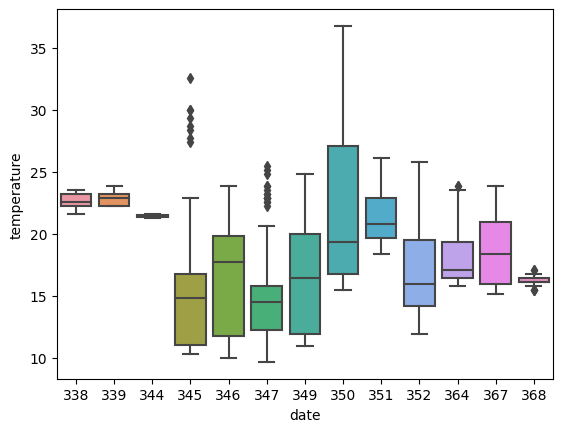

In [164]:
sns.boxplot(data=spd_train,x='date',y='temperature')
plt.show()

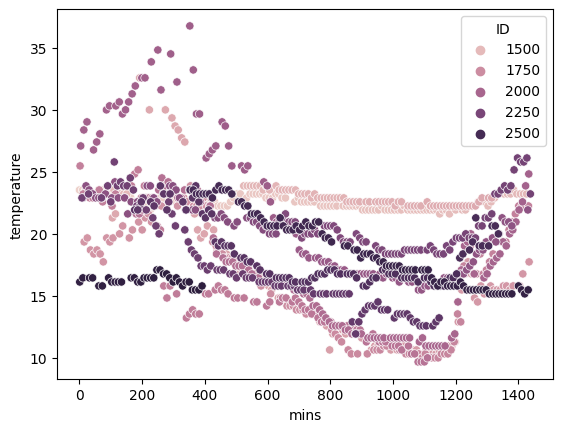

In [165]:
sns.scatterplot(data=spd_train,x='mins',y='temperature', hue='ID')
plt.show()

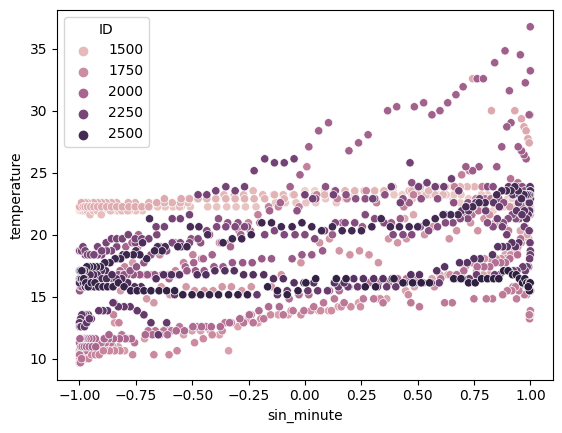

In [166]:
sns.scatterplot(data=spd_train,x='sin_minute',y='temperature', hue='ID')
plt.show()

### Humidity EDA

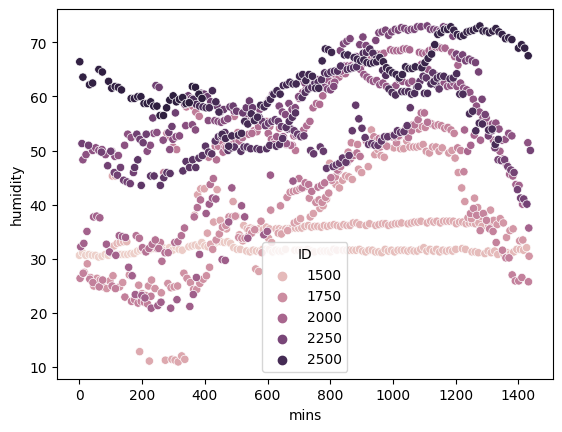

In [167]:
sns.scatterplot(data=spd_train,x='mins',y='humidity', hue='ID')
plt.show()

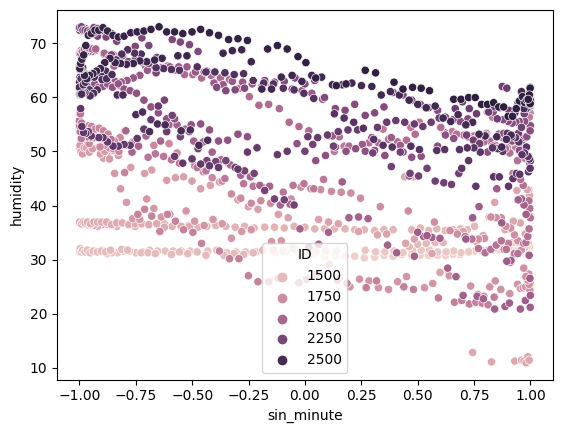

In [168]:
sns.scatterplot(data=spd_train,x='sin_minute',y='humidity', hue='ID')
plt.show()

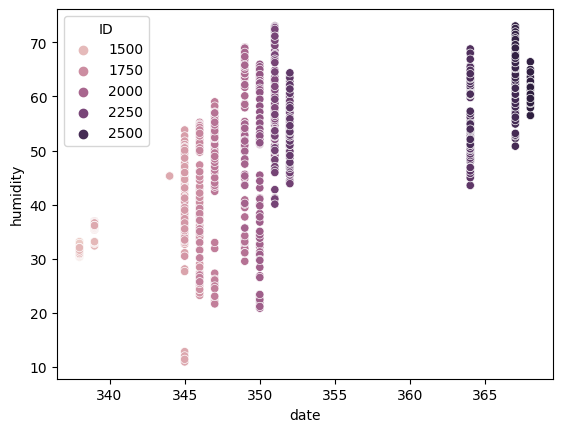

In [169]:
sns.scatterplot(data=spd_train,x='date',y='humidity', hue='ID')
plt.show()

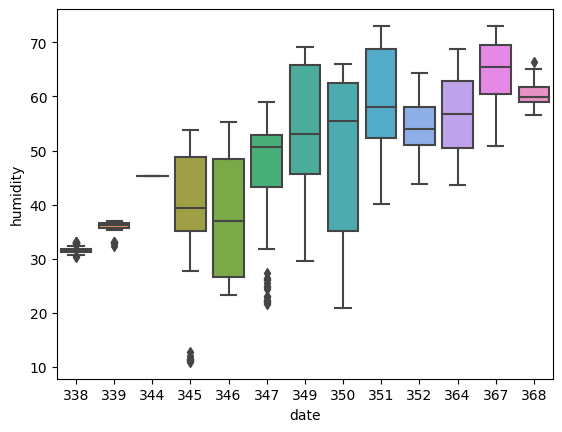

In [170]:
sns.boxplot(data=spd_train,x='date',y='humidity')
plt.show()

In [197]:
spd_train.describe()

,temperature,humidity,lat,lng,node,ts_value,mins,date,sin_minute,date_norm,min_norm
count,1154.000000,1154.000000,1.154000e+03,1154.000000,1154.0,1.154000e+03,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000
mean,18.825125,48.307251,-3.781461e+01,144.979018,502.0,1.419199e+09,740.372617,350.196707,-0.044424,0.406557,0.514863
std,4.555427,13.960354,7.108508e-15,0.000000,0.0,8.007739e+05,388.183791,8.921472,0.720323,0.297382,0.269947
min,9.672000,10.920000,-3.781461e+01,144.979018,502.0,1.418083e+09,0.000000,338.000000,-0.999998,0.000000,0.000000
25%,15.800000,35.680000,-3.781461e+01,144.979018,502.0,1.418762e+09,418.250000,345.000000,-0.768922,0.233333,0.290855
50%,18.700000,50.660000,-3.781461e+01,144.979018,502.0,1.419101e+09,755.000000,349.000000,-0.095979,0.366667,0.525035
75%,22.580000,59.965250,-3.781461e+01,144.979018,502.0,1.419319e+09,1061.750000,352.000000,0.694640,0.466667,0.738352
max,36.770000,73.047000,-3.781461e+01,144.979018,502.0,1.420785e+09,1438.000000,368.000000,0.999998,1.000000,1.000000


In [172]:
spd_train.corr()

C:\Users\Archit Agarwal\AppData\Local\Temp\ipykernel_21572\2707083639.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spd_train.corr()


,temperature,humidity,lat,lng,node,ts_value,mins,date,sin_minute,date_norm
temperature,1.000000,-0.541868,NaN,NaN,NaN,-0.174191,-0.395639,-0.166074,0.469618,-0.166074
humidity,-0.541868,1.000000,NaN,NaN,NaN,0.659944,0.320201,0.656294,-0.365412,0.656294
lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts_value,-0.174191,0.659944,NaN,NaN,NaN,1.000000,0.002202,0.999330,0.028816,0.999330
mins,-0.395639,0.320201,NaN,NaN,NaN,0.002202,1.000000,-0.027855,-0.806875,-0.027855
date,-0.166074,0.656294,NaN,NaN,NaN,0.999330,-0.027855,1.000000,0.053009,1.000000
sin_minute,0.469618,-0.365412,NaN,NaN,NaN,0.028816,-0.806875,0.053009,1.000000,0.053009
date_norm,-0.166074,0.656294,NaN,NaN,NaN,0.999330,-0.027855,1.000000,0.053009,1.000000


## Linear Regression
Trying out different ML approches (non-probabilistic)

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [182]:
model = LinearRegression()
X = spd_train[['date_norm','humidity','sin_minute']]
y = spd_train['temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
model.fit(X_train, y_train)


LinearRegression()

In [183]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.37849219959257707
The rmse is:  3.552819713868655


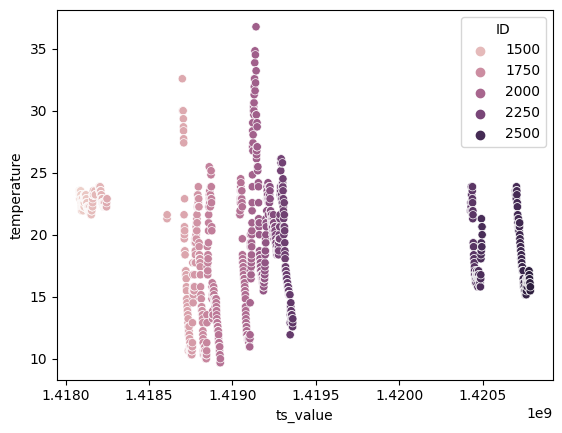

In [184]:
sns.scatterplot(data=spd_train,x='ts_value',y='temperature', hue='ID')
plt.show()

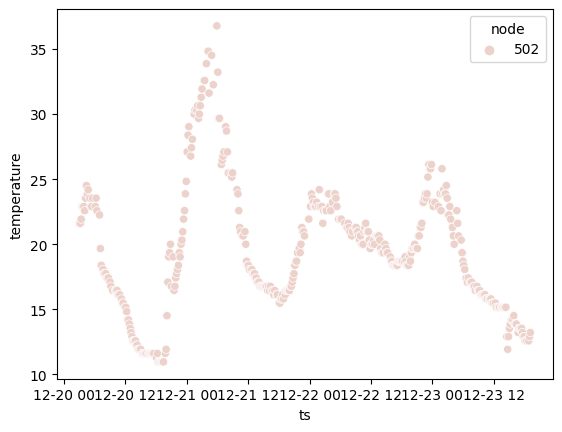

In [269]:
sns.scatterplot(data=spd_train[(spd_train['ts_value']>1419004000) & (spd_train['ts_value']<1419504000)],x='ts',y='temperature', hue='node')
# sns.scatterplot(data=spd_train,x='ts_value',y='temperature', hue='node')
plt.show()

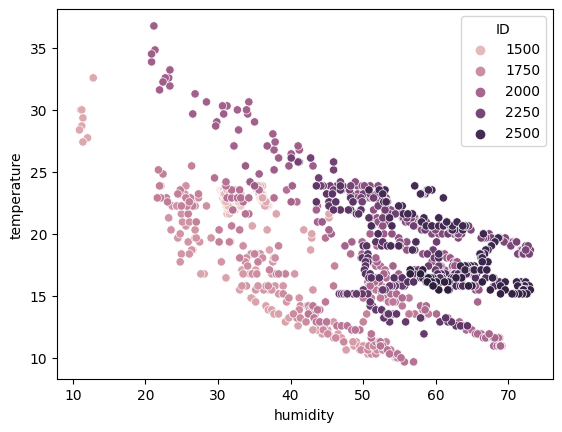

In [186]:
sns.scatterplot(data=spd_train,x='humidity',y='temperature', hue='ID')
plt.show()

## Gaussian Process Regression

In [204]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import RationalQuadratic

In [312]:
std_dev = 4.592659 #all
std_dev = 4.555427 #pd2

In [313]:
# kernel =   RBF(length_scale=604800) +  RBF(length_scale=86400) * ExpSineSquared(periodicity=86400,length_scale=86400) + RationalQuadratic(alpha=0.145, length_scale=86400) + WhiteKernel(noise_level=0.0111)
# kernel =   RBF(length_scale=[604800,30],length_scale_bounds=[1,1e7]) 
kernel = RBF(length_scale=[604800,5],length_scale_bounds="fixed")*RationalQuadratic(alpha=0.145, length_scale=86400,length_scale_bounds=[100,1e7]) +  RBF(length_scale=[604800,5],length_scale_bounds="fixed")*ExpSineSquared(periodicity=86400,length_scale=100000,length_scale_bounds=[100,1e7])

gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9 )
X = spd_train[['ts_value','node']]
y = spd_train[['temperature','humidity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)


In [314]:
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__length_scale is close to the specified lower bound 100.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RBF(length_scale=[6.05e+05, 5]) * RationalQuadratic(alpha=0.364, length_scale=1.34e+03) + RBF(length_scale=[6.05e+05, 5]) * ExpSineSquared(length_scale=100, periodicity=246)

In [315]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)


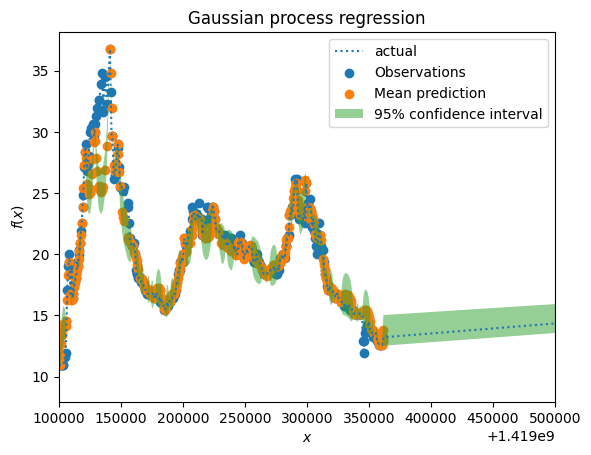

In [316]:
plt.cla()
plt.plot(spd_train['ts_value'], y['temperature'], label="actual", linestyle="dotted")
plt.scatter(spd_train['ts_value'], y['temperature'], label="Observations")
plt.scatter(spd_train['ts_value'], mean_prediction[:,0], label="Mean prediction")
plt.fill_between(
    spd_train['ts_value'].ravel(),
    mean_prediction[:,0] - 1.96 * std_prediction[:,0],
    mean_prediction[:,0] + 1.96 * std_prediction[:,0],
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.xlim([1419100000,1419500000])
_ = plt.title("Gaussian process regression")


In [317]:
predictions = gaussian_process.predict(X)
r2 = r2_score(y, predictions)
rmse = mean_squared_error(y, predictions, squared=False)

# print('The r2 is: ', r2)
print('The train rmse is: ', rmse)

predictions = gaussian_process.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

# print('The r2 is: ', r2)
print('The test rmse is: ', rmse)

The train rmse is:  1.901432025507754
The test rmse is:  2.2723646701203446


In [318]:
predictions

array([[20.91088892, 55.00959619],
       [19.13107042, 57.19780645],
       [17.02280659, 34.97618274],
       ...,
       [18.72184716, 52.28782738],
       [23.30862588, 54.60762   ],
       [21.0680894 , 58.04862971]])

The r2 is:  0.8202506605929709
The rmse is:  1.9445077752005535

In [320]:
for i in range(0,20):
    kernel = RationalQuadratic(alpha=0.145, length_scale=86400,length_scale_bounds=[100,1e7])

    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9 )
    X = spd_train[['ts_value','node']]
    y = spd_train[['temperature','humidity']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
    
    gaussian_process.fit(X_train, y_train)
    print(gaussian_process.kernel_)
    
    predictions = gaussian_process.predict(X)
#     r2 = r2_score(y, predictions)
    rmse = mean_squared_error(y, predictions, squared=False)

    # print('The r2 is: ', r2)
    print('The train rmse is: ', rmse)

    predictions = gaussian_process.predict(X_test)
#     r2 = r2_score(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    # print('The r2 is: ', r2)
    print('The test rmse is: ', rmse,'\n')

RationalQuadratic(alpha=0.0992, length_scale=957)
The train rmse is:  1.6858452019374628
The test rmse is:  2.01472102330432 

RationalQuadratic(alpha=0.0998, length_scale=1.04e+03)
The train rmse is:  1.643275612086619
The test rmse is:  1.9638469290948566 

RationalQuadratic(alpha=0.1, length_scale=1e+03)
The train rmse is:  1.5050589252286355
The test rmse is:  1.798666837551329 

RationalQuadratic(alpha=0.102, length_scale=1.24e+03)
The train rmse is:  1.4707015636358538
The test rmse is:  1.7576070186387185 

RationalQuadratic(alpha=0.101, length_scale=1.05e+03)
The train rmse is:  1.6917012581696744
The test rmse is:  2.0217194829441074 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RationalQuadratic(alpha=0.0971, length_scale=1e+03)
The train rmse is:  2.049210687501895
The test rmse is:  2.4489720933720216 

RationalQuadratic(alpha=0.0984, length_scale=902)
The train rmse is:  1.8285786468595737
The test rmse is:  2.1852990051277645 

RationalQuadratic(alpha=0.1, length_scale=1.09e+03)
The train rmse is:  1.6435057628572436
The test rmse is:  1.9641219778333618 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RationalQuadratic(alpha=0.0958, length_scale=988)
The train rmse is:  1.8232963350533589
The test rmse is:  2.1789862163643585 

RationalQuadratic(alpha=0.101, length_scale=1.11e+03)
The train rmse is:  1.6638635053964064
The test rmse is:  1.988451122545778 

RationalQuadratic(alpha=0.103, length_scale=1.2e+03)
The train rmse is:  1.6940839226013709
The test rmse is:  2.0245669591634554 

RationalQuadratic(alpha=0.0996, length_scale=1.14e+03)
The train rmse is:  1.6957903257031253
The test rmse is:  2.026606248535567 

RationalQuadratic(alpha=0.0988, length_scale=859)
The train rmse is:  1.5525891147006727
The test rmse is:  1.8554692485086928 

RationalQuadratic(alpha=0.0977, length_scale=997)
The train rmse is:  1.7213331792574404
The test rmse is:  2.057132019224311 

RationalQuadratic(alpha=0.0993, length_scale=1.05e+03)
The train rmse is:  1.6724152386998141
The test rmse is:  1.9986711337616745 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RationalQuadratic(alpha=0.102, length_scale=1.28e+03)
The train rmse is:  1.7384183056054479
The test rmse is:  2.077550123567214 

RationalQuadratic(alpha=0.0978, length_scale=963)
The train rmse is:  1.9963480681390575
The test rmse is:  2.3857969984968577 

RationalQuadratic(alpha=0.101, length_scale=1.14e+03)
The train rmse is:  1.7337372899015362
The test rmse is:  2.071955932156135 

RationalQuadratic(alpha=0.104, length_scale=1.28e+03)
The train rmse is:  1.4712856568682537
The test rmse is:  1.7583050571736525 

RationalQuadratic(alpha=0.0999, length_scale=1.11e+03)
The train rmse is:  1.700691342917331
The test rmse is:  2.032463359500256 



In [325]:
for i in range(0,20):
    kernel = RationalQuadratic(alpha=0.102, length_scale=1.24e+03,length_scale_bounds="fixed", alpha_bounds="fixed") + RBF(length_scale=604800,length_scale_bounds=[100,1e8]) * ExpSineSquared(periodicity=86400,length_scale=100000,length_scale_bounds="fixed",periodicity_bounds="fixed")

    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9 )
    X = spd_train[['ts_value']]
    y = spd_train[['temperature','humidity']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
    
    gaussian_process.fit(X_train, y_train)
    print(gaussian_process.kernel_)
    
    predictions = gaussian_process.predict(X)
#     r2 = r2_score(y, predictions)
    rmse = mean_squared_error(y, predictions, squared=False)

    # print('The r2 is: ', r2)
    print('The train rmse is: ', rmse)

    predictions = gaussian_process.predict(X_test)
#     r2 = r2_score(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    # print('The r2 is: ', r2)
    print('The test rmse is: ', rmse,'\n')

C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=6.97e+03) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.232808409097168
The test rmse is:  1.473305506733324 

RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=1.03e+04) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.2911116273784058
The test rmse is:  1.5429825562409025 

RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=1.13e+04) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.5541465786312054
The test rmse is:  1.8573305435554004 

RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=1.11e+04) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.4282212164053834
The test rmse is:  1.7068395765603257 

RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.96e+03) * ExpSineSquared(length_scale=1e+05

C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=1.18e+04) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.4627357340894054
The test rmse is:  1.7480872096806686 

RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=6.65e+03) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.3893209094748271
The test rmse is:  1.6603505714631115 

RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=1.15e+04) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.310675815806237
The test rmse is:  1.5663633397696275 

RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=9.1e+03) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.5935741458363888
The test rmse is:  1.904449667217961 

RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=1.02e+04) * ExpSineSquared(length_scale=1e+05,

C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=1.06e+04) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.1928170603706265
The test rmse is:  1.4255126186691882 

RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=1.11e+04) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.3371422568443965
The test rmse is:  1.5979928720127679 

RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=1.06e+04) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.365936841875789
The test rmse is:  1.6324047241528081 

RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=1.13e+04) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.6534621191326233
The test rmse is:  1.9760206268199139 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=6.75e+03) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.24702707452715
The test rmse is:  1.4902979590250254 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=1.01e+04) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.5035325994126085
The test rmse is:  1.7968427550635488 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  1.1529658635403972
The test rmse is:  1.3778872234280197 

RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=1.2e+04) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)
The train rmse is:  2.0996935706202304
The test rmse is:  2.5093032114477705 



RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1e+05, periodicity=8.64e+04)

In [330]:
for i in range(0,20):
    kernel = RationalQuadratic(alpha=0.102, length_scale=1.24e+03,length_scale_bounds="fixed", alpha_bounds="fixed") + RBF(length_scale=8.97e+03,length_scale_bounds="fixed") * ExpSineSquared(periodicity=86400,length_scale=2,length_scale_bounds=[1e-1,20],periodicity_bounds=[50000,300000])

    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9 )
    X = spd_train[['ts_value']]
    y = spd_train[['temperature','humidity']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
    
    gaussian_process.fit(X_train, y_train)
    print(gaussian_process.kernel_)
    
    predictions = gaussian_process.predict(X)
#     r2 = r2_score(y, predictions)
    rmse = mean_squared_error(y, predictions, squared=False)

    # print('The r2 is: ', r2)
    print('The train rmse is: ', rmse)

    predictions = gaussian_process.predict(X_test)
#     r2 = r2_score(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    # print('The r2 is: ', r2)
    print('The test rmse is: ', rmse,'\n')

C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=2.25, periodicity=5e+04)
The train rmse is:  1.3681247771618563
The test rmse is:  1.635019483333191 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1.32, periodicity=5e+04)
The train rmse is:  1.2649420545537677
The test rmse is:  1.511707805463015 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1.26, periodicity=5e+04)
The train rmse is:  1.4027230641092614
The test rmse is:  1.6763672274814343 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1.36, periodicity=5e+04)
The train rmse is:  1.2087800304429892
The test rmse is:  1.444589655731788 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__length_scale is close to the specified upper bound 20.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified upper bound 300000. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=20, periodicity=3e+05)
The train rmse is:  1.4910312187117432
The test rmse is:  1.7819025965665427 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1.7, periodicity=5e+04)
The train rmse is:  1.1467318572442537
The test rmse is:  1.3704370829703914 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__length_scale is close to the specified upper bound 20.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified upper bound 300000. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=20, periodicity=3e+05)
The train rmse is:  2.1100875841266156
The test rmse is:  2.5217248961337435 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1.22, periodicity=5e+04)
The train rmse is:  1.313504560761294
The test rmse is:  1.5697439182023158 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1.26, periodicity=5e+04)
The train rmse is:  1.4573811964481291
The test rmse is:  1.7416881052174862 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1.57, periodicity=5e+04)
The train rmse is:  1.4363971173300067
The test rmse is:  1.7166104377629803 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1.91, periodicity=5e+04)
The train rmse is:  1.2629554860987482
The test rmse is:  1.509333695891175 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__length_scale is close to the specified upper bound 20.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified upper bound 300000. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=20, periodicity=3e+05)
The train rmse is:  1.5800538512075084
The test rmse is:  1.8882918243752314 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__length_scale is close to the specified upper bound 20.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified upper bound 300000. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=20, periodicity=3e+05)
The train rmse is:  1.3917803089971752
The test rmse is:  1.6632897523064574 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1.59, periodicity=5e+04)
The train rmse is:  1.3533243893476083
The test rmse is:  1.617331825861348 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1.45, periodicity=5e+04)
The train rmse is:  1.1607248635590324
The test rmse is:  1.3871598544141832 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1.25, periodicity=5e+04)
The train rmse is:  1.7564428231533584
The test rmse is:  2.0990908761801816 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1.24, periodicity=5e+04)
The train rmse is:  1.3313784603717402
The test rmse is:  1.591104670228784 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=1.35, periodicity=5e+04)
The train rmse is:  1.2804487220581455
The test rmse is:  1.5302395241442774 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 50000. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=2.22, periodicity=5e+04)
The train rmse is:  1.2982300862305416
The test rmse is:  1.5514896888569008 



C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__length_scale is close to the specified upper bound 20.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Archit Agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified upper bound 300000. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


RationalQuadratic(alpha=0.102, length_scale=1.24e+03) + RBF(length_scale=8.97e+03) * ExpSineSquared(length_scale=20, periodicity=3e+05)
The train rmse is:  1.4675009535613728
The test rmse is:  1.7537820313877848 



In [332]:
for i in range(0,20):
    kernel =  RBF(length_scale=8.97e+03,length_scale_bounds=[100, 1e8]) + RationalQuadratic(alpha=0.102, length_scale=1.24e+03,length_scale_bounds="fixed") * ExpSineSquared(periodicity=86400,length_scale=2,length_scale_bounds=[1e-1,20],periodicity_bounds=[50000,300000])

    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9 )
    X = spd_train[['ts_value']]
    y = spd_train[['temperature','humidity']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
    
    gaussian_process.fit(X_train, y_train)
    print(gaussian_process.kernel_)
    
    predictions = gaussian_process.predict(X)
#     r2 = r2_score(y, predictions)
    rmse = mean_squared_error(y, predictions, squared=False)

    # print('The r2 is: ', r2)
    print('The train rmse is: ', rmse)

    predictions = gaussian_process.predict(X_test)
#     r2 = r2_score(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    # print('The r2 is: ', r2)
    print('The test rmse is: ', rmse,'\n')

RBF(length_scale=1.59e+03)
The train rmse is:  11.533459079182148
The test rmse is:  13.783414071199118 

RBF(length_scale=1.83e+03)
The train rmse is:  10.99983186441666
The test rmse is:  13.145686498726999 

RBF(length_scale=1.8e+03)
The train rmse is:  8.974269441229076
The test rmse is:  10.724975989054332 

RBF(length_scale=1.6e+03)
The train rmse is:  11.97166959425437
The test rmse is:  14.30711098971477 

RBF(length_scale=1.44e+03)
The train rmse is:  12.104644742755116
The test rmse is:  14.466027020055853 

RBF(length_scale=1.42e+03)
The train rmse is:  12.686322253631642
The test rmse is:  15.161178572878988 

RBF(length_scale=1.65e+03)
The train rmse is:  11.050764908162957
The test rmse is:  13.206555595070258 

RBF(length_scale=1.52e+03)
The train rmse is:  11.071462349295087
The test rmse is:  13.231290707006737 

RBF(length_scale=1.55e+03)
The train rmse is:  11.29034892960236
The test rmse is:  13.49287782933413 

RBF(length_scale=1.65e+03)
The train rmse is:  10.0454

KeyboardInterrupt: 